![alt text](https://moodle.msengineering.ch/pluginfile.php/1/core_admin/logo/0x150/1643104191/logo-mse.png "MSE Logo") 
![alt text](https://www.hes-so.ch/typo3conf/ext/wng_site/Resources/Public/HES-SO/img/logo_hesso_master_tablet.svg "Hes Logo")

# Auteur : Abdi VURAL
## L'objectif
 l'EDA est une étape cruciale dans le cycle d'analyse des données, permettant de tirer des conclusions préliminaires, de préparer les données de manière adéquate, et de guider les étapes ultérieures d'analyse ou de modélisation.

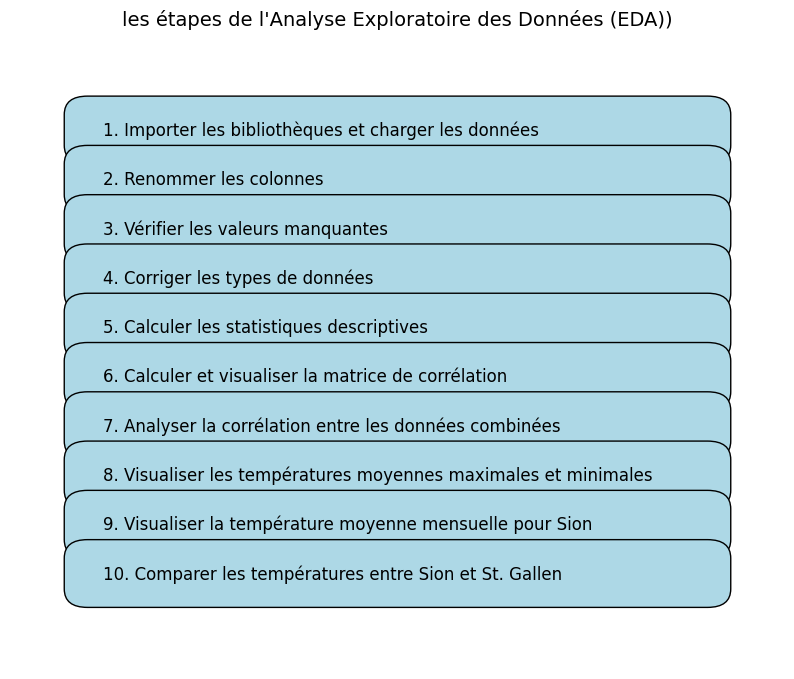

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



# Charger le fichier CSV pour examiner son contenu
data_path = "C:/Users/Abdi/Desktop/data/raw/meteo_idaweb.csv"
data = pd.read_csv(data_path)

# Afficher les premières lignes pour avoir un aperçu des données
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4711680 entries, 0 to 4711679
Data columns (total 19 columns):
 #   Column         Dtype  
---  ------         -----  
 0   stn            object 
 1   xchills0       float64
 2   gre000z0       float64
 3   prestas0       float64
 4   tre200s0       float64
 5   rre150z0       float64
 6   ure200s0       float64
 7   sre000z0       float64
 8   fu3010z0       float64
 9   dkl010z0       float64
 10  year           float64
 11  day_of_year    int64  
 12  minute_of_day  int64  
 13  name           object 
 14  longitude      float64
 15  latitude       float64
 16  km_longitude   float64
 17  km_latitude    float64
 18  altitude       float64
dtypes: float64(15), int64(2), object(2)
memory usage: 683.0+ MB


(None,
    stn  xchills0  gre000z0  prestas0  tre200s0  rre150z0  ure200s0  sre000z0  \
 0  ABO       2.7       3.0     879.1       2.7       0.0      55.9       0.0   
 1  ABO       2.1       4.0     879.0       2.1       0.0      56.0       0.0   
 2  ABO       3.4       3.0     878.9       3.4       0.0      52.7       0.0   
 3  ABO       2.5       2.0     878.8       2.5       0.0      55.5       0.0   
 4  ABO       2.3       2.0     878.6       2.3       0.0      56.6       0.0   
 
    fu3010z0  dkl010z0    year  day_of_year  minute_of_day       name  \
 0       2.2     228.0  2020.0            1              0  Adelboden   
 1       2.2     355.0  2020.0            1             10  Adelboden   
 2       3.6     225.0  2020.0            1             20  Adelboden   
 3       2.5       4.0  2020.0            1             30  Adelboden   
 4       4.3     262.0  2020.0            1             40  Adelboden   
 
    longitude  latitude  km_longitude  km_latitude  altitude  
 0

In [55]:
# Dictionnaire pour renommer les colonnes: clés = anciens noms, valeurs = nouveaux noms
nouveaux_noms = {
    'stn': 'ID_Station',
    'xchills0': 'Refroidissement_Eolien',
    'gre000z0': 'Quantite_Precipitations',
    'prestas0': 'Pression_Atmospherique',
    'tre200s0': 'Temperature',
    'rre150z0': 'Precipitations',
    'ure200s0': 'Humidite_Relative',
    'sre000z0': 'Ensoleillement',
    'fu3010z0': 'Vitesse_Vent',
    'dkl010z0': 'Direction_Vent',
    'year': 'Annee',
    'day_of_year': 'Jour_Annee',
    'minute_of_day': 'Minute_Jour',
    'name': 'Nom_Station',
    'longitude': 'Longitude',
    'latitude': 'Latitude',
    'km_longitude': 'Longitude_KM',
    'km_latitude': 'Latitude_KM',
    'altitude': 'Altitude'
}

data.rename(columns=nouveaux_noms, inplace=True)
data_info, data_head

(None,
    stn  xchills0  gre000z0  prestas0  tre200s0  rre150z0  ure200s0  sre000z0  \
 0  ABO       2.7       3.0     879.1       2.7       0.0      55.9       0.0   
 1  ABO       2.1       4.0     879.0       2.1       0.0      56.0       0.0   
 2  ABO       3.4       3.0     878.9       3.4       0.0      52.7       0.0   
 3  ABO       2.5       2.0     878.8       2.5       0.0      55.5       0.0   
 4  ABO       2.3       2.0     878.6       2.3       0.0      56.6       0.0   
 
    fu3010z0  dkl010z0    year  day_of_year  minute_of_day       name  \
 0       2.2     228.0  2020.0            1              0  Adelboden   
 1       2.2     355.0  2020.0            1             10  Adelboden   
 2       3.6     225.0  2020.0            1             20  Adelboden   
 3       2.5       4.0  2020.0            1             30  Adelboden   
 4       4.3     262.0  2020.0            1             40  Adelboden   
 
    longitude  latitude  km_longitude  km_latitude  altitude  
 0

In [56]:
# Vérification des valeurs manquantes dans le dataset
missing_values = data.isnull().sum()

missing_values


ID_Station                 0
Refroidissement_Eolien     0
Quantite_Precipitations    0
Pression_Atmospherique     0
Temperature                0
Precipitations             0
Humidite_Relative          0
Ensoleillement             0
Vitesse_Vent               0
Direction_Vent             0
Annee                      0
Jour_Annee                 0
Minute_Jour                0
Nom_Station                0
Longitude                  0
Latitude                   0
Longitude_KM               0
Latitude_KM                0
Altitude                   0
dtype: int64

In [57]:
# Correction du type de données pour la colonne 'year'
data['Annee'] = data['Annee'].astype(int)

# Vérifier les types de données 
data_types = data.dtypes

data_types


ID_Station                  object
Refroidissement_Eolien     float64
Quantite_Precipitations    float64
Pression_Atmospherique     float64
Temperature                float64
Precipitations             float64
Humidite_Relative          float64
Ensoleillement             float64
Vitesse_Vent               float64
Direction_Vent             float64
Annee                        int32
Jour_Annee                   int64
Minute_Jour                  int64
Nom_Station                 object
Longitude                  float64
Latitude                   float64
Longitude_KM               float64
Latitude_KM                float64
Altitude                   float64
dtype: object

In [58]:
# Calcul des statistiques descriptives pour les variables numériques
descriptive_stats = data.describe()

descriptive_stats
#print(data.describe())


,Refroidissement_Eolien,Quantite_Precipitations,Pression_Atmospherique,Temperature,Precipitations,Humidite_Relative,Ensoleillement,Vitesse_Vent,Direction_Vent,Annee,Jour_Annee,Minute_Jour,Longitude,Latitude,Longitude_KM,Latitude_KM,Altitude
count,4.711680e+06,4.711680e+06,4.711680e+06,4.711680e+06,4.711680e+06,4.711680e+06,4.711680e+06,4.711680e+06,4.711680e+06,4.711680e+06,4.711680e+06,4.711680e+06,4.711680e+06,4.711680e+06,4.711680e+06,4.711680e+06,4.711680e+06
mean,9.001708e+00,1.550769e+02,9.322173e+02,9.734206e+00,1.935051e-02,7.247769e+01,2.172483e+00,8.125203e+00,1.762780e+02,2.020999e+03,1.833062e+02,7.150000e+02,8.052487e+00,4.677212e+01,6.466881e+05,1.808546e+05,7.488103e+02
std,9.027656e+00,2.524546e+02,5.061246e+01,8.284711e+00,1.510580e-01,1.952683e+01,3.979693e+00,7.500430e+00,1.027411e+02,8.172755e-01,1.053634e+02,4.156822e+02,9.960354e-01,4.576096e-01,7.613063e+04,5.096733e+04,4.626454e+02
min,-3.400000e+01,0.000000e+00,7.671000e+02,-3.050000e+01,0.000000e+00,2.600000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.020000e+03,1.000000e+00,0.000000e+00,6.133333e+00,4.600000e+01,4.989040e+05,9.588400e+04,2.730000e+02
25%,2.100000e+00,0.000000e+00,9.029000e+02,3.400000e+00,0.000000e+00,5.840000e+01,0.000000e+00,2.900000e+00,7.800000e+01,2.020000e+03,9.200000e+01,3.575000e+02,7.333333e+00,4.650000e+01,5.916330e+05,1.489390e+05,4.380000e+02
50%,9.000000e+00,5.000000e+00,9.554000e+02,9.500000e+00,0.000000e+00,7.600000e+01,0.000000e+00,5.400000e+00,1.930000e+02,2.021000e+03,1.830000e+02,7.150000e+02,8.083333e+00,4.681667e+01,6.483950e+05,1.860690e+05,5.160000e+02
75%,1.570000e+01,2.180000e+02,9.674000e+02,1.570000e+01,0.000000e+00,8.920000e+01,1.000000e+00,1.120000e+01,2.580000e+02,2.022000e+03,2.750000e+02,1.072500e+03,8.783333e+00,4.703333e+01,7.041660e+05,2.105670e+05,1.017000e+03
max,3.830000e+01,1.393000e+03,1.008700e+03,3.830000e+01,2.270000e+01,1.000000e+02,1.000000e+01,9.000000e+01,3.600000e+02,2.022000e+03,3.660000e+02,1.430000e+03,9.883333e+00,4.768333e+01,7.872490e+05,2.828030e+05,1.974000e+03


In [59]:

# Calcul de la matrice de corrélation
correlation_matrix = data.corr()

# Affichage de la matrice de corrélation
correlation_matrix


C:\Users\Abdi\AppData\Local\Temp\ipykernel_18176\2448512367.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


,Refroidissement_Eolien,Quantite_Precipitations,Pression_Atmospherique,Temperature,Precipitations,Humidite_Relative,Ensoleillement,Vitesse_Vent,Direction_Vent,Annee,Jour_Annee,Minute_Jour,Longitude,Latitude,Longitude_KM,Latitude_KM,Altitude
Refroidissement_Eolien,1.000000,0.435767,0.309204,0.989314,-0.002257,-0.381242,0.358611,0.028533,0.026072,3.084530e-02,1.606112e-01,1.049154e-01,-6.894631e-02,3.876211e-03,-6.876546e-02,3.803003e-03,-3.072993e-01
Quantite_Precipitations,0.435767,1.000000,-0.005044,0.452427,-0.067995,-0.516395,0.830175,0.216309,-0.054926,1.022747e-02,-6.250541e-02,-3.688089e-02,-3.473716e-03,-2.758299e-02,-3.326655e-03,-2.747972e-02,1.276626e-02
Pression_Atmospherique,0.309204,-0.005044,1.000000,0.295319,-0.009197,0.030177,0.028713,-0.121796,0.035596,7.291163e-03,-1.719711e-02,-1.779206e-03,-2.128011e-01,2.280883e-01,-2.136286e-01,2.283275e-01,-9.894797e-01
Temperature,0.989314,0.452427,0.295319,1.000000,0.000908,-0.406576,0.370220,0.125105,0.024795,3.037550e-02,1.492058e-01,1.131158e-01,-8.326729e-02,8.009197e-03,-8.317873e-02,7.787088e-03,-2.958047e-01
Precipitations,-0.002257,-0.067995,-0.009197,0.000908,1.000000,0.127832,-0.069495,0.044031,0.027651,-7.207931e-03,1.221172e-02,1.334283e-02,8.090006e-03,4.662085e-03,8.105569e-03,4.698866e-03,-3.643495e-03
Humidite_Relative,-0.381242,-0.516395,0.030177,-0.406576,0.127832,1.000000,-0.499009,-0.310933,0.003782,-3.601107e-02,2.174821e-01,-1.552932e-01,-3.036729e-02,1.353370e-01,-3.110246e-02,1.350709e-01,-4.315168e-02
Ensoleillement,0.358611,0.830175,0.028713,0.370220,-0.069495,-0.499009,1.000000,0.139542,-0.073255,1.401533e-02,-5.718339e-02,-3.404469e-02,-1.728677e-02,-2.309602e-02,-1.708207e-02,-2.308414e-02,-1.187806e-02
Vitesse_Vent,0.028533,0.216309,-0.121796,0.125105,0.044031,-0.310933,0.139542,1.000000,0.036724,-1.394550e-02,-9.269796e-02,7.659803e-02,-8.313096e-02,-2.073522e-02,-8.394988e-02,-2.136359e-02,1.035559e-01
Direction_Vent,0.026072,-0.054926,0.035596,0.024795,0.027651,0.003782,-0.073255,0.036724,1.000000,-9.297238e-03,-5.836684e-03,1.285981e-02,-7.741973e-03,-3.973315e-02,-7.402784e-03,-4.001025e-02,-4.441983e-02
Annee,0.030845,0.010227,0.007291,0.030376,-0.007208,-0.036011,0.014015,-0.013946,-0.009297,1.000000e+00,-9.884100e-04,-1.292767e-15,1.737001e-03,-5.204338e-05,1.740425e-03,-1.964847e-05,-9.952210e-05


C:\Users\Abdi\AppData\Local\Temp\ipykernel_18176\3225144884.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


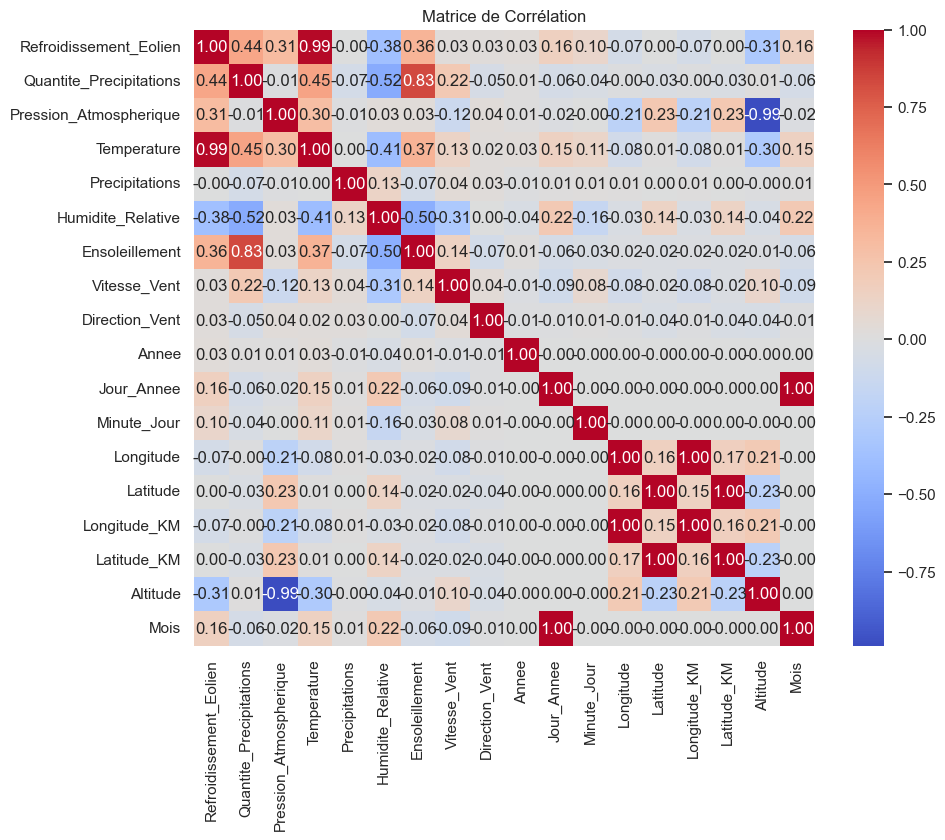

In [110]:
# Calcul de la matrice de corrélation
correlation_matrix = data.corr()

# Création d'une heatmap pour visualiser la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Matrice de Corrélation')
plt.show()


In [60]:
# Création de la liste contenant tous les noms des colonnes
tous_les_noms_colonnes = data.columns.tolist()

# Affichage de la liste
print("tous_les_noms_colonnes = ", tous_les_noms_colonnes)


tous_les_noms_colonnes =  ['ID_Station', 'Refroidissement_Eolien', 'Quantite_Precipitations', 'Pression_Atmospherique', 'Temperature', 'Precipitations', 'Humidite_Relative', 'Ensoleillement', 'Vitesse_Vent', 'Direction_Vent', 'Annee', 'Jour_Annee', 'Minute_Jour', 'Nom_Station', 'Longitude', 'Latitude', 'Longitude_KM', 'Latitude_KM', 'Altitude']


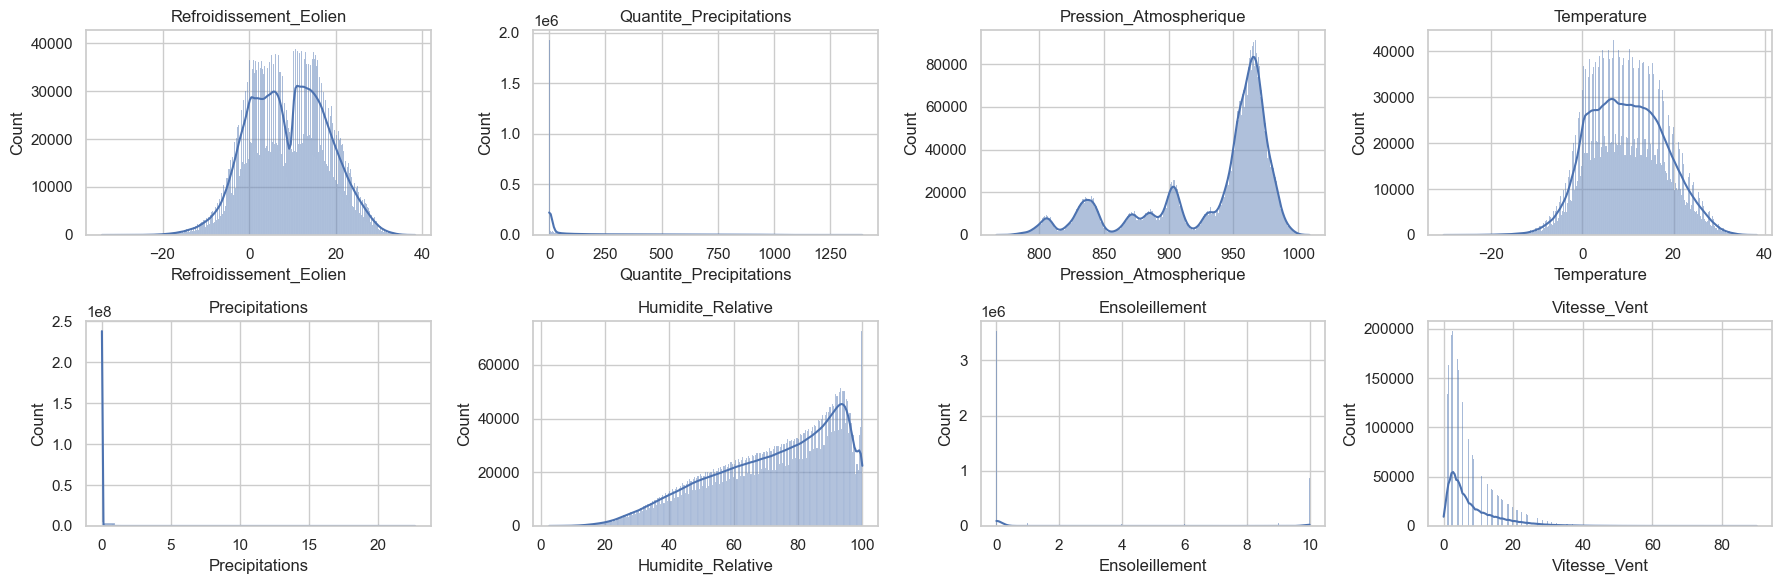

In [111]:
numeric_cols =  [ 'Refroidissement_Eolien', 'Quantite_Precipitations', 'Pression_Atmospherique', 'Temperature', 'Precipitations', 'Humidite_Relative', 'Ensoleillement', 'Vitesse_Vent']
# Distribution of numeric features
plt.figure(figsize=(18, 6))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 4, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

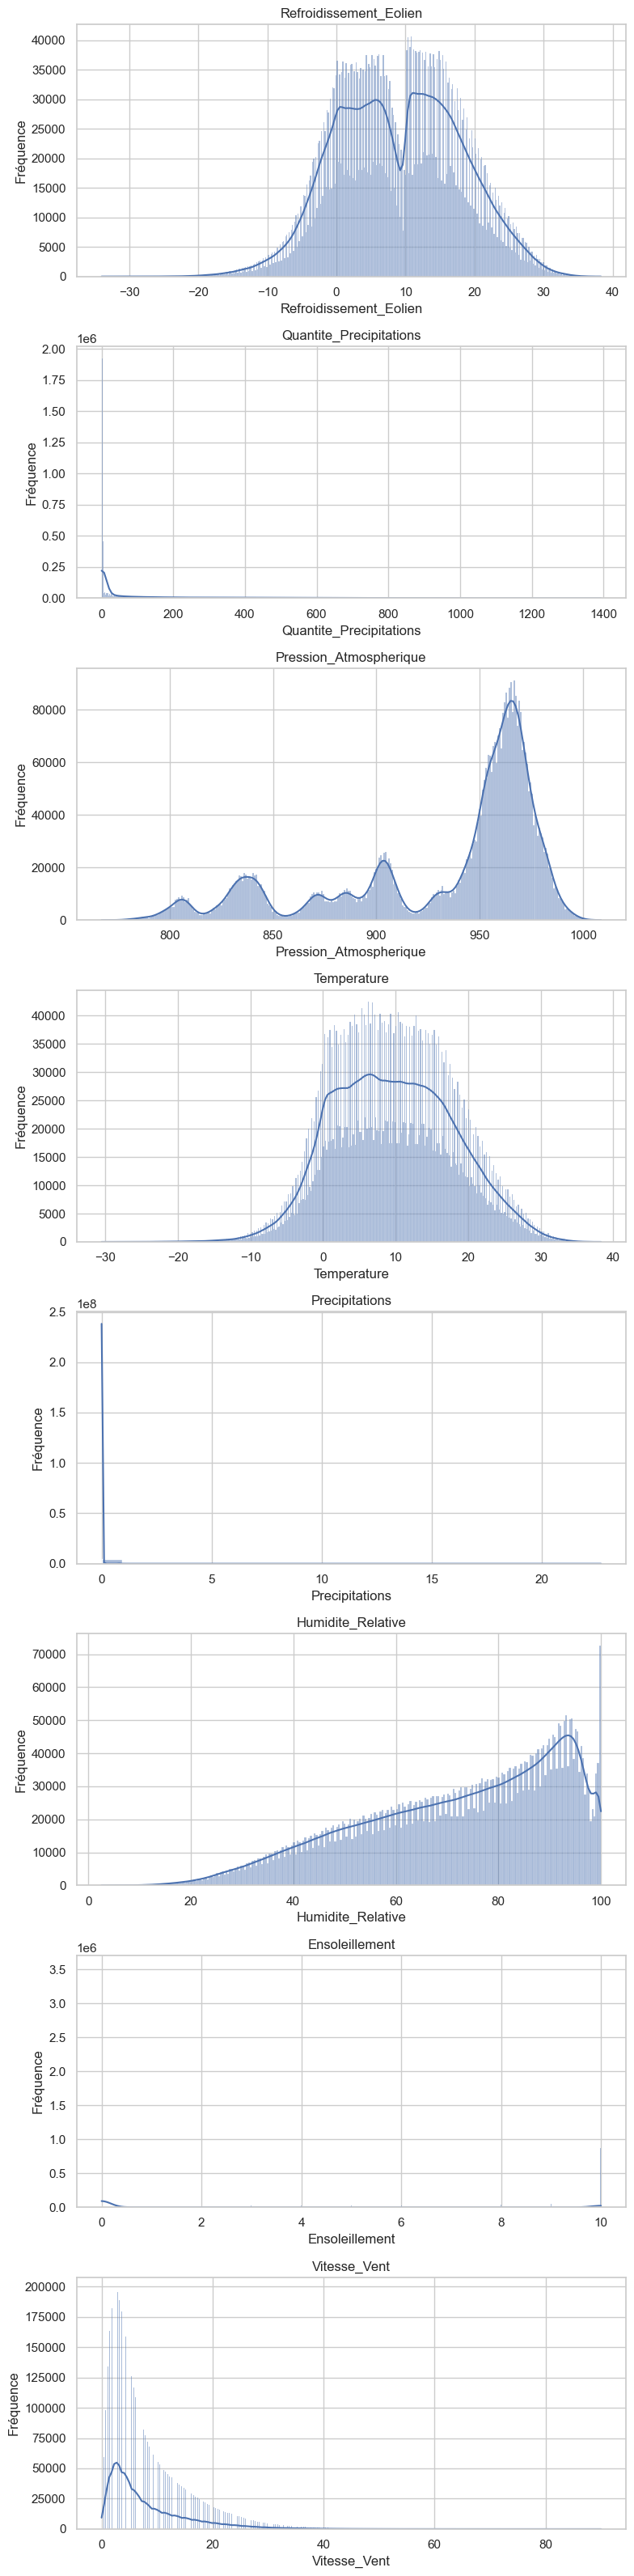

In [112]:

features = ['Refroidissement_Eolien', 'Quantite_Precipitations', 'Pression_Atmospherique', 'Temperature', 'Precipitations', 'Humidite_Relative', 'Ensoleillement', 'Vitesse_Vent']

# Configuration de Seaborn
sns.set(style='whitegrid')

# Création des subplots pour chaque feature
fig, axes = plt.subplots(nrows=len(features), ncols=1,figsize=(8, 4 * len(features)))
#fig, axes = plt.subplots(3, 3, figsize=(18, 12))


for i, feature in enumerate(features):
    sns.histplot(data[feature], kde=True, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()


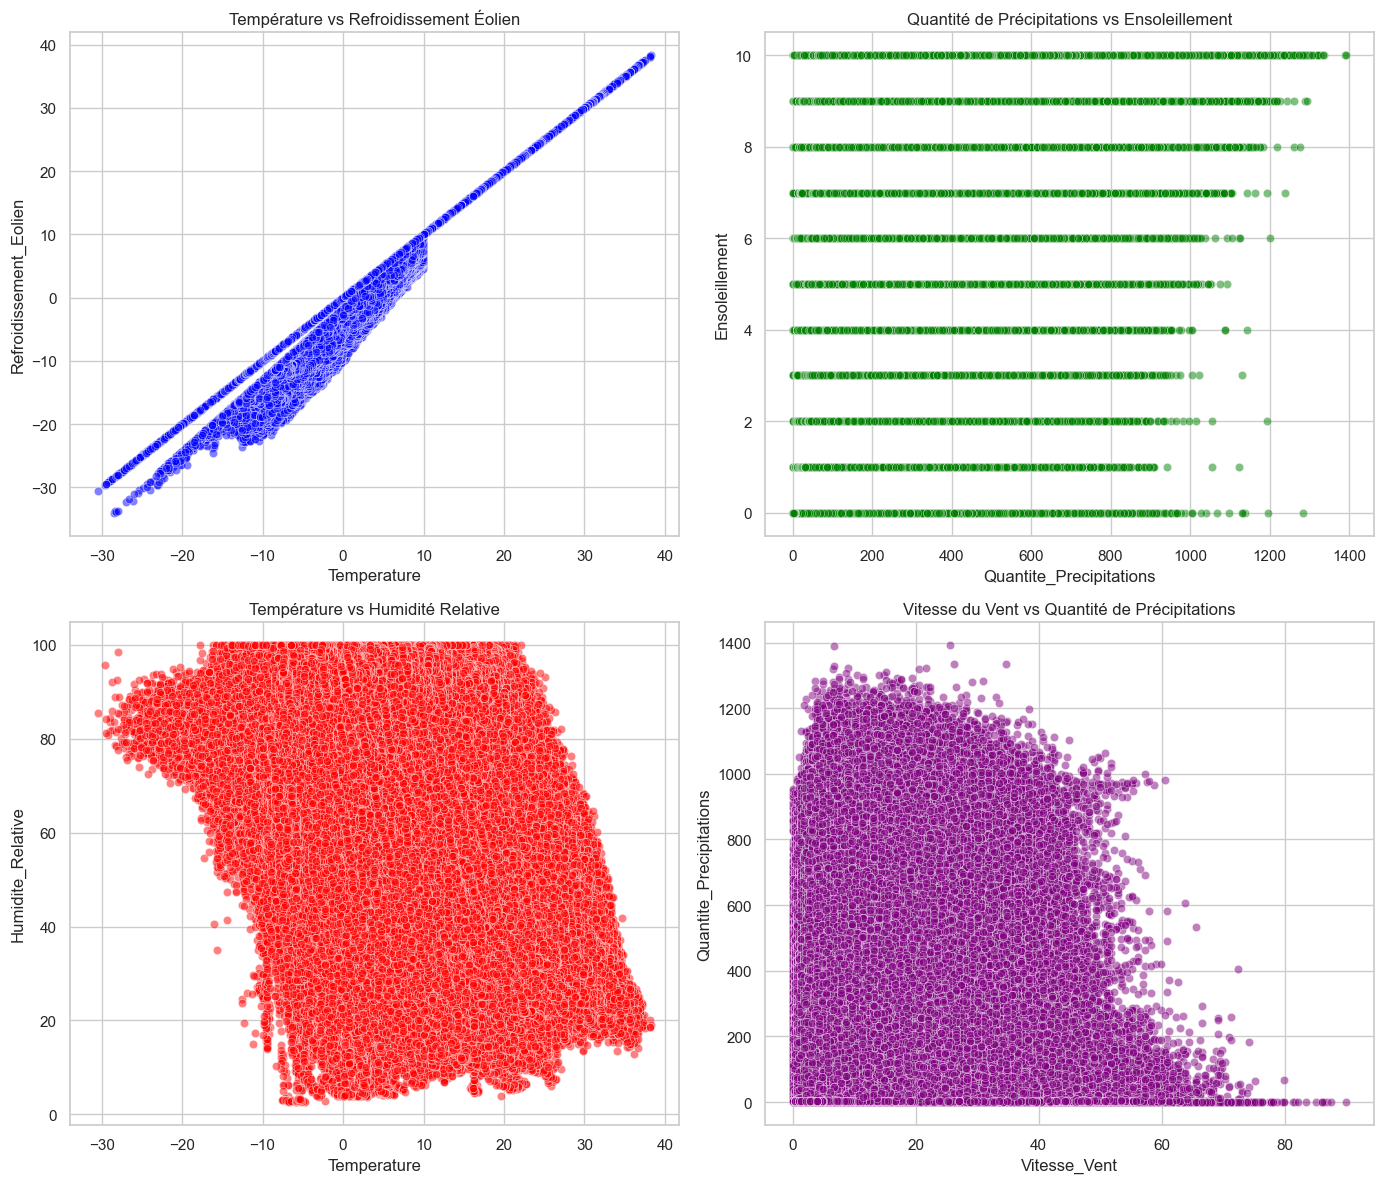

In [113]:
# Configuration du style des graphiques
sns.set(style="whitegrid")

# Préparation de la figure pour les diagrammes de dispersion
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Température et Refroidissement Éolien
sns.scatterplot(x='Temperature', y='Refroidissement_Eolien', data=data, ax=axes[0, 0], color="blue", alpha=0.5)
axes[0, 0].set_title('Température vs Refroidissement Éolien')

# Quantité de Précipitations et Ensoleillement
sns.scatterplot(x='Quantite_Precipitations', y='Ensoleillement', data=data, ax=axes[0, 1], color="green", alpha=0.5)
axes[0, 1].set_title('Quantité de Précipitations vs Ensoleillement')

# Température et Humidité Relative
sns.scatterplot(x='Temperature', y='Humidite_Relative', data=data, ax=axes[1, 0], color="red", alpha=0.5)
axes[1, 0].set_title('Température vs Humidité Relative')

# Vitesse du Vent et Quantité de Précipitations
sns.scatterplot(x='Vitesse_Vent', y='Quantite_Precipitations', data=data, ax=axes[1, 1], color="purple", alpha=0.5)
axes[1, 1].set_title('Vitesse du Vent vs Quantité de Précipitations')

plt.tight_layout()
plt.show()


In [61]:
# Calcul de la température moyenne par année
temperature_moyenne_par_annee = data.groupby('Annee')['Temperature'].mean().reset_index()

# Affichage
print(temperature_moyenne_par_annee)


   Annee  Temperature
0   2020     9.911367
1   2021     8.757933
2   2022    10.528666


In [63]:

data['Annee'] = data['Annee'].astype(int)
data['Jour_Annee'] = data['Jour_Annee'].astype(int)

# Convertir le numéro du jour et l'année en objet datetime
data['Date'] = pd.to_datetime(data['Annee'].astype(str) + data['Jour_Annee'].astype(str), format='%Y%j')
data['Date_Formatee'] = data['Date'].dt.strftime('%d/%m/%y')
print(data[['Annee', 'Jour_Annee', 'Date_Formatee']].head())


   Annee  Jour_Annee Date_Formatee
0   2020           1      01/01/20
1   2020           1      01/01/20
2   2020           1      01/01/20
3   2020           1      01/01/20
4   2020           1      01/01/20


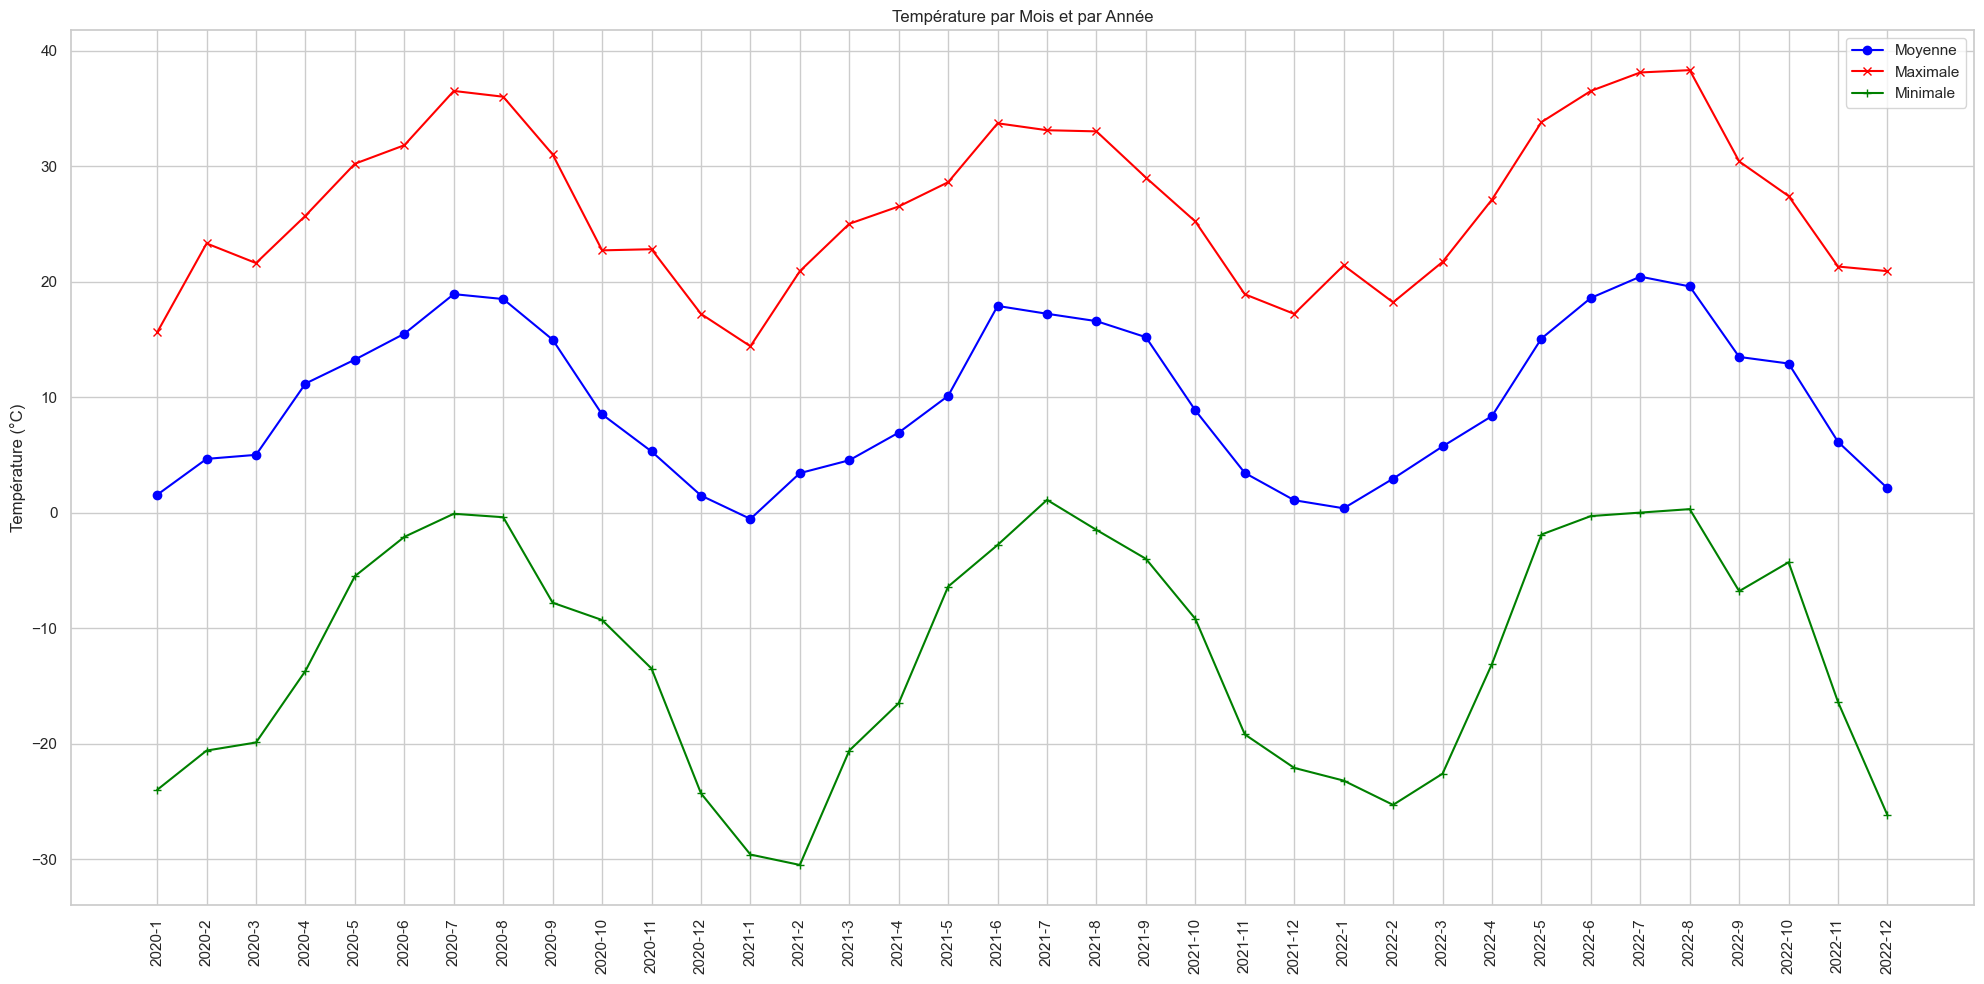

In [65]:

data['Date'] = pd.to_datetime(data['Date'])

# Extraire l'année et le mois
data['Mois'] = data['Date'].dt.month
data['Annee'] = data['Date'].dt.year

# Calculer les statistiques de température par mois et par année
temp_stats = data.groupby(['Annee', 'Mois'])['Temperature'].agg(['mean', 'max', 'min']).reset_index()

# Renommer les colonnes pour la clarté
temp_stats.rename(columns={'mean': 'Temp_Moyenne', 'max': 'Temp_Max', 'min': 'Temp_Min'}, inplace=True)

# Tracer les statistiques de température
plt.figure(figsize=(20, 10))

# Température moyenne
plt.plot(temp_stats['Annee'].astype(str) + '-' + temp_stats['Mois'].astype(str), temp_stats['Temp_Moyenne'], label='Moyenne', color='blue', marker='o')

# Température maximale
plt.plot(temp_stats['Annee'].astype(str) + '-' + temp_stats['Mois'].astype(str), temp_stats['Temp_Max'], label='Maximale', color='red', marker='x')

# Température minimale
plt.plot(temp_stats['Annee'].astype(str) + '-' + temp_stats['Mois'].astype(str), temp_stats['Temp_Min'], label='Minimale', color='green', marker='+')

plt.xticks(rotation=90)  # Rotation des étiquettes de l'axe X pour une meilleure lisibilité
plt.ylabel('Température (°C)')
plt.title('Température par Mois et par Année')
plt.legend()
plt.tight_layout()  # Ajuste automatiquement les sous-graphiques pour qu'ils s'insèrent dans la figure
plt.show()


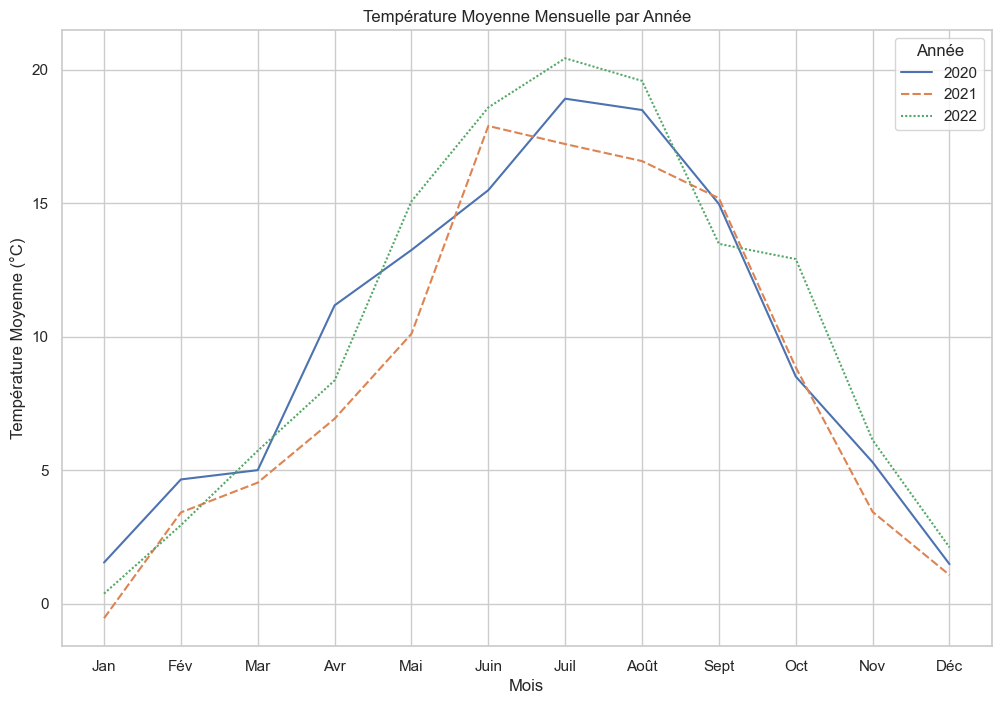

In [66]:


# Supposons que 'data' est votre DataFrame préparé
data['Mois'] = data['Date'].dt.month

# Calcul des températures moyennes mensuelles pour chaque année
temp_moyenne_mensuelle = data.groupby(['Annee', 'Mois'])['Temperature'].mean().unstack(level=0)

# Tracé des températures moyennes mensuelles pour chaque année
plt.figure(figsize=(12, 8))
sns.lineplot(data=temp_moyenne_mensuelle)
plt.title('Température Moyenne Mensuelle par Année')
plt.xlabel('Mois')
plt.ylabel('Température Moyenne (°C)')
plt.xticks(range(1, 13), ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sept', 'Oct', 'Nov', 'Déc'])
plt.legend(title='Année')
plt.grid(True)
plt.show()


In [68]:
# Liste des villes uniques
villes_uniques = data['Nom_Station'].unique()

# Affichage des villes
print(villes_uniques)


['Adelboden' 'Altdorf' 'Basel / Binningen' 'Bern / Zollikofen'
 'Buchs / Aarau' 'La Chaux-de-Fonds' 'Chur' 'Davos' 'Delémont' 'Disentis'
 'Engelberg' 'Evionnaz' 'Glarus' 'Genève / Cointrin' 'Interlaken' 'Lugano'
 'Luzern' 'Mathod' 'Le Moléson' 'Neuchâtel' 'Locarno / Monti' 'Piotta'
 'Pully' 'Samedan' 'Schaffhausen' 'Sion' 'Zürich / Fluntern' 'St. Gallen'
 'Visp' 'Zermatt']


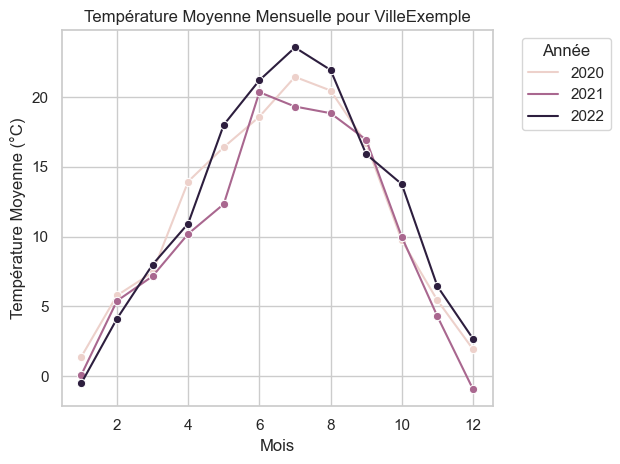

In [69]:
donnees_ville = data[data['Nom_Station'] == "Sion"]

# Calculer les températures moyennes mensuelles
temp_moyennes_mensuelles = donnees_ville.groupby(['Annee', 'Mois'])['Temperature'].mean().reset_index()
sns.lineplot(data=temp_moyennes_mensuelles, x='Mois', y='Temperature', hue='Annee', marker='o')
plt.title('Température Moyenne Mensuelle pour VilleExemple')
plt.xlabel('Mois')
plt.ylabel('Température Moyenne (°C)')
plt.legend(title='Année', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\Abdi\AppData\Local\Temp\ipykernel_18176\1996737364.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donnees_ville['Saison'] = np.select(conditions, choix_saisons, default='Inconnu')


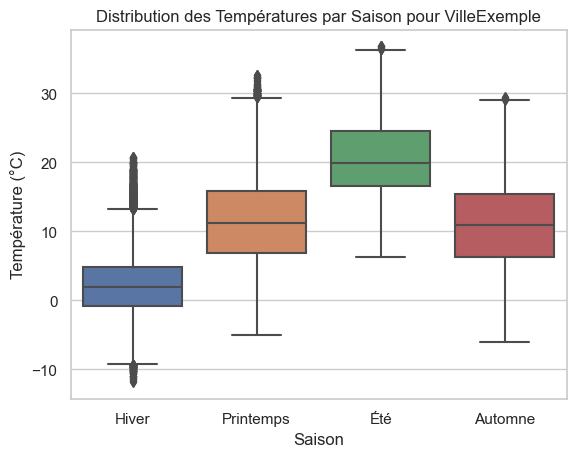

In [71]:
# Filtrer les données pour "VilleExemple"
donnees_ville = data[data['Nom_Station'] == "Sion"]
# Définition des saisons
conditions = [
    (donnees_ville['Mois'].isin([12, 1, 2])),  # Hiver
    (donnees_ville['Mois'].isin([3, 4, 5])),   # Printemps
    (donnees_ville['Mois'].isin([6, 7, 8])),   # Été
    (donnees_ville['Mois'].isin([9, 10, 11]))  # Automne
]
choix_saisons = ['Hiver', 'Printemps', 'Été', 'Automne']
donnees_ville['Saison'] = np.select(conditions, choix_saisons, default='Inconnu')

# Visualisation des températures par saison
sns.boxplot(data=donnees_ville, x='Saison', y='Temperature')
plt.title('Distribution des Températures par Saison pour VilleExemple')
plt.xlabel('Saison')
plt.ylabel('Température (°C)')
plt.show()


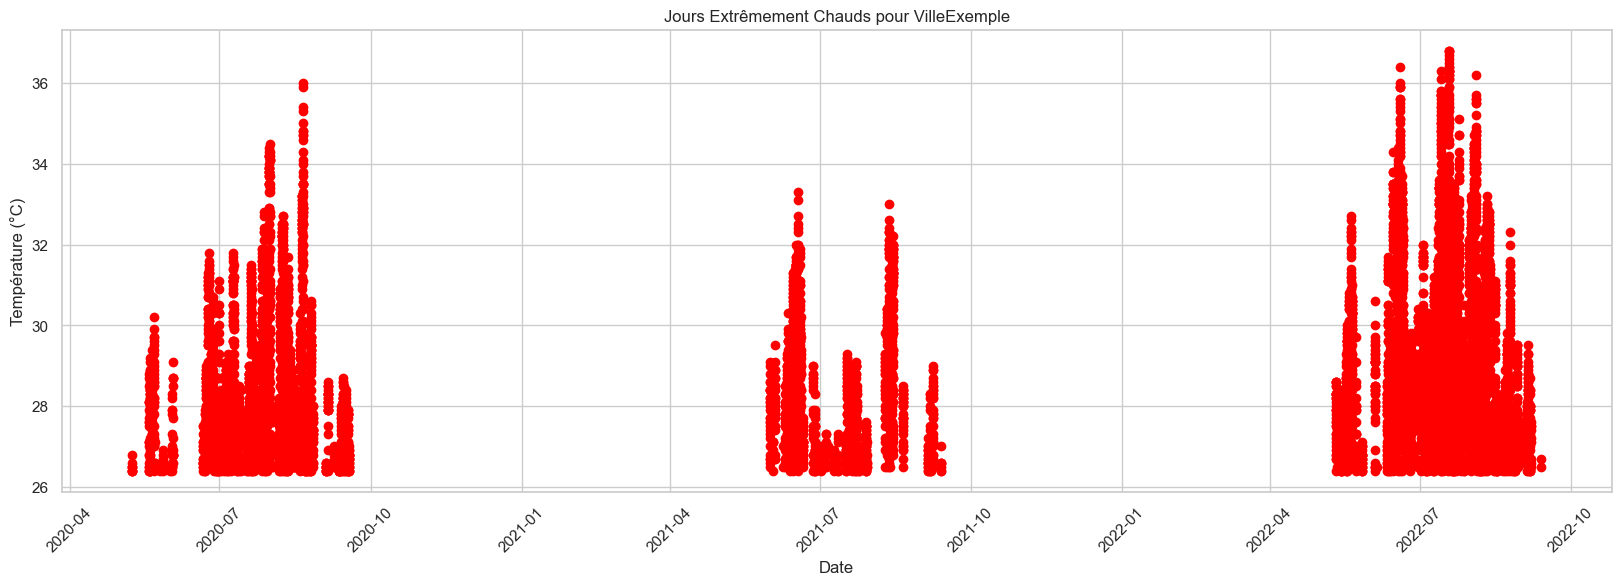

In [73]:

# Filtrer les données pour "VilleExemple"
donnees_ville = data[data['Nom_Station'] == "Sion"]
# Identifier les jours extrêmement chauds (exemple : température > 95e percentile)
seuil_chaud = donnees_ville['Temperature'].quantile(0.95)
jours_chauds = donnees_ville[donnees_ville['Temperature'] > seuil_chaud]

# Ajuster la taille du graphique
plt.figure(figsize=(20, 6))  # Augmenter la largeur à 20 pouces

# Visualisation des jours chauds au fil du temps
plt.scatter(jours_chauds['Date'], jours_chauds['Temperature'], color='red')
plt.title('Jours Extrêmement Chauds pour VilleExemple')
plt.xlabel('Date')
plt.ylabel('Température (°C)')

# Ajuster les étiquettes de l'axe des x pour une meilleure lisibilité
plt.xticks(rotation=45)

plt.show()


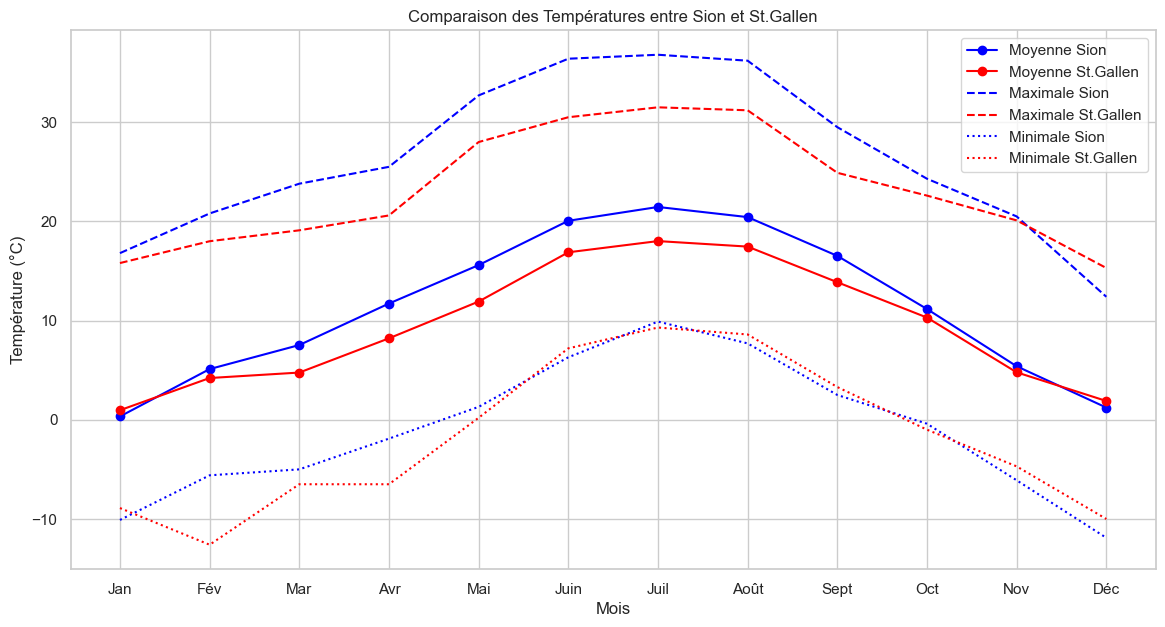

In [78]:
donnees_villeA = data[data['Nom_Station'] == "Sion"]
donnees_villeB = data[data['Nom_Station'] == "St. Gallen"]
stats_villeA = donnees_villeA.groupby('Mois')['Temperature'].agg(['mean', 'max', 'min']).reset_index()
stats_villeB = donnees_villeB.groupby('Mois')['Temperature'].agg(['mean', 'max', 'min']).reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(14, 7))

# Température moyenne
plt.plot(stats_villeA['Mois'], stats_villeA['mean'], label='Moyenne Sion', marker='o', color='blue')
plt.plot(stats_villeB['Mois'], stats_villeB['mean'], label='Moyenne St.Gallen', marker='o', color='red')

# Température maximale
plt.plot(stats_villeA['Mois'], stats_villeA['max'], label='Maximale Sion', linestyle='--', color='blue')
plt.plot(stats_villeB['Mois'], stats_villeB['max'], label='Maximale St.Gallen', linestyle='--', color='red')

# Température minimale
plt.plot(stats_villeA['Mois'], stats_villeA['min'], label='Minimale Sion', linestyle=':', color='blue')
plt.plot(stats_villeB['Mois'], stats_villeB['min'], label='Minimale St.Gallen', linestyle=':', color='red')

plt.title('Comparaison des Températures entre Sion et St.Gallen')
plt.xlabel('Mois')
plt.ylabel('Température (°C)')
plt.xticks(range(1, 13), ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sept', 'Oct', 'Nov', 'Déc'])
plt.legend()
plt.show()


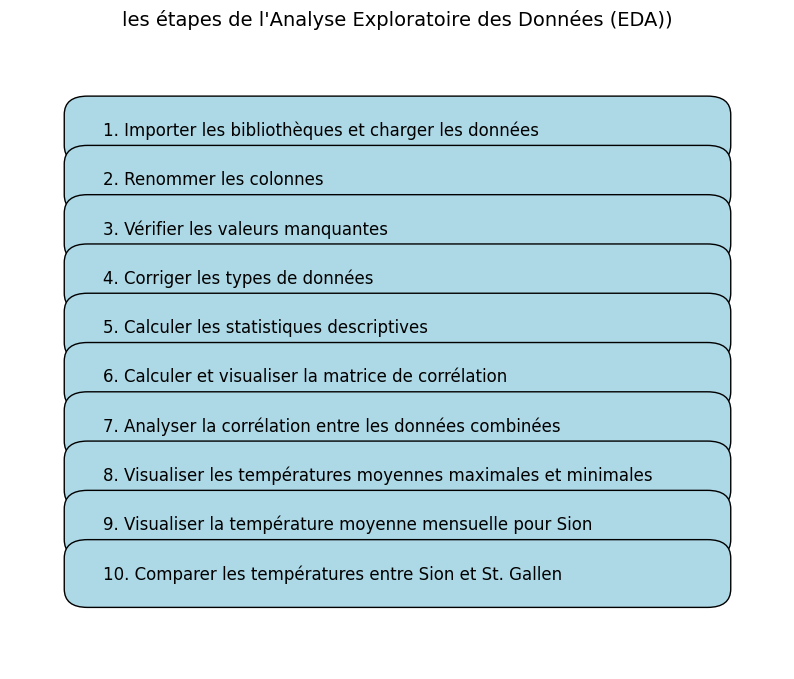

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Create a list of steps
steps = [
     "1. Importer les bibliothèques et charger les données",
    "2. Renommer les colonnes",
    "3. Vérifier les valeurs manquantes",
    "4. Corriger les types de données",
    "5. Calculer les statistiques descriptives",
    "6. Calculer et visualiser la matrice de corrélation",
    "7. Analyser la corrélation entre les données combinées",
    "8. Visualiser les températures moyennes maximales et minimales",
    "9. Visualiser la température moyenne mensuelle pour Sion",
    "10. Comparer les températures entre Sion et St. Gallen"
]

# Set initial position for the first box
x, y = 0.1, 0.9

# Set box width and height
box_width, box_height = 0.8, 0.05

# Add each step as a box
for step in steps:
    rect = patches.FancyBboxPatch((x, y - box_height), box_width, box_height, boxstyle="round,pad=0.03", edgecolor="black", facecolor="#ADD8E6")
    ax.add_patch(rect)
    ax.text(x + 0.02, y - box_height / 2, step, verticalalignment='center', fontsize=12)
    y -= 0.08  # Update position for the next box

# Set the limits and turn off the axes
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

# Title
plt.title("les étapes de l'Analyse Exploratoire des Données (EDA))", fontsize=14, pad=20)

# Display the plot
plt.show()
